# 1. To develop your version K-Means using the algorithm
- Implemented my version of K-Means in KMeans.py file
- References: https://towardsdatascience.com/the-math-and-code-behind-k-means-clustering-795582423666

### Import required libraries
- Importing all the necessary libraries required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from KMeans import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

/var/folders/r1/vx6sqznx105fj1p57dq87q900000gp/T/ipykernel_51478/3170492372.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Input data
- These data points represent coordinates in a 2D space.
- The goal is to apply the K-Means algorithm to cluster these points into distinct groups.
- Each sublist in X corresponds to the (x, y) coordinates of an instance.
- This sample data has 8 instances for demonstration purposes.

In [2]:
X = [[0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10]]

### Applying K-Means Clustering
- Initializing a KMeans object with k=2, indicating the desired number of clusters.
- Performing K-Means clustering on the dataset X.
- The result includes cluster labels assigned to each data point (cluster_labels)
  and the coordinates of the cluster centroids (centroids).

In [3]:
kmeans = KMeans(k=2)
labels, centroids = kmeans.fit(X)

### Expected output
- Printing the expected cluster labels for the given dataset X.
- Printing the expected coordinates of cluster centroids after K-Means clustering.

In [4]:
expected_labels = [0, 0, 0, 0, 1, 1, 1, 1]
expected_centroids = [[1, 1], [9, 9]]

print("Expected lables:", expected_labels)
print("Expected centroids:", expected_centroids)

Expected lables: [0, 0, 0, 0, 1, 1, 1, 1]
Expected centroids: [[1, 1], [9, 9]]


# 2. To compare the performance of different implementations

### Generating My Cluster Assignments
- Using make_blobs to generate 700 instances of data points with 4 clusters in 2-dimensional space.
- Parameters: n_samples=700 (number of instances), centers=4 (number of clusters),
  cluster_std=0.60 (standard deviation of each cluster), random_state=0 (seed for reproducibility).
- Displaying the generated data points in X.

In [5]:
X, My_cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)
X

array([[-0.84177847,  7.86655225],
       [-1.21515296,  8.01484649],
       [ 1.84320847, -0.07222085],
       ...,
       [-1.83141457,  2.2867542 ],
       [-1.84639796,  3.30491543],
       [ 0.28256062,  4.77250619]])

### Printing cluster_assignments

In [6]:
My_cluster_assignments

array([3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 0, 1, 3, 1, 2, 0, 0, 3, 1, 3, 1, 1,
       2, 1, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 1, 3, 3, 1, 1, 0, 0, 1, 1, 2,
       1, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0, 2, 1, 3, 0, 1, 2, 1, 2, 2, 3, 0,
       1, 2, 1, 1, 3, 1, 3, 3, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 3, 0, 2,
       0, 2, 3, 3, 0, 3, 3, 3, 2, 1, 3, 3, 3, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 3, 3, 2, 2, 0, 1, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3,
       2, 1, 0, 3, 3, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 3, 2, 1, 0, 2, 0, 1,
       0, 3, 3, 1, 0, 2, 3, 0, 0, 2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 0, 0, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 3, 2, 2,
       2, 0, 1, 1, 1, 3, 0, 0, 2, 2, 1, 3, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1,
       0, 3, 1, 3, 3, 2, 0, 1, 1, 0, 3, 3, 3, 3, 0, 2, 3, 1, 1, 3, 0, 3,
       3, 0, 0, 1, 1, 0, 1, 2, 2, 2, 3, 1, 2, 0, 3, 0, 3, 3, 3, 2, 0, 2,
       2, 3, 3, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 3, 3, 1, 1, 2, 1, 1, 3, 0, 1, 3, 2, 0, 0,

### My custom KMeans implementation
- Applying K-Means clustering with k=4 to the dataset X.
- Displaying the coordinates of cluster centroids after clustering.

In [7]:
kmeans = KMeans(k=4)
labels, centroids = kmeans.fit(X)
centroids

[[0.9004393234899268, 4.32217463716],
 [1.9877063026473274, 0.8318857877497887],
 [-1.4997094181421273, 2.905741940858995],
 [-1.2040579337244177, 7.837858432492295]]

### Scikit-learn KMeans implementation
- Importing necessary library
- Applying K-Means clustering with k=4 to the dataset X.
- Displaying the kmeans_sklearn after clustering.

In [8]:
from sklearn.cluster import KMeans
kmeans_sklearn = KMeans(n_clusters=4, random_state=0)
sklearn_cluster_assignments = kmeans_sklearn.fit_predict(X)

### Comparison of Cluster Assignments: Custom KMeans vs. Scikit-learn KMeans vs. Actual Clusters
- Creating a 12x4 figure.
- Setting up a 1x3 grid.
- Actual clusters, color-coded by My_cluster_assignments.
- My KMeans clusters, color-coded by your custom assignments.
- Scikit-learn KMeans clusters, color-coded by scikit-learn assignments.
- Displaying the figure with three subplots.

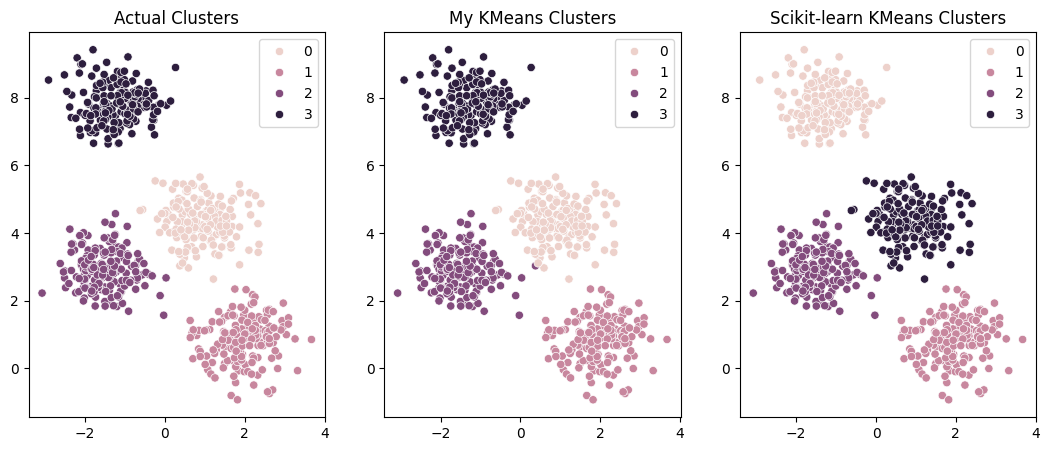

In [9]:
plt.figure(figsize=(13, 5))

# Plot for 'labels'
plt.subplot(1, 3, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.title('Actual Clusters')
plt.legend()

# Plot for 'My_cluster_assignments'
plt.subplot(1, 3, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=My_cluster_assignments)
plt.title('My KMeans Clusters')
plt.legend()

# Plot for 'sklearn_cluster_assignments'
plt.subplot(1, 3, 3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=sklearn_cluster_assignments)
plt.title('Scikit-learn KMeans Clusters')
plt.legend()

plt.show()

### Comparison of Cluster Assignments

In [10]:
comparison_my_vs_actual = np.sum(My_cluster_assignments == labels) / len(labels)
comparison_my_vs_sklearn = np.sum(My_cluster_assignments == sklearn_cluster_assignments) / len(sklearn_cluster_assignments)

print(f"Comparison (My KMeans vs Actual): {comparison_my_vs_actual:.2%}")
print(f"Comparison (My KMeans vs Scikit-learn KMeans): {comparison_my_vs_sklearn:.2%}")

Comparison (My KMeans vs Actual): 99.86%
Comparison (My KMeans vs Scikit-learn KMeans): 49.86%


### V-Measure Comparison Between Custom K-Means and Scikit-Learn K-Means
- Calculating and printing the V-Measure scores and a metric for clustering evaluation.
- Comparing the clustering results of a custom K-Means implementation.

In [11]:
from sklearn.metrics import v_measure_score
v_measure_my_kmeans = v_measure_score(My_cluster_assignments, labels)
v_measure_sklearn_kmeans = v_measure_score(My_cluster_assignments,sklearn_cluster_assignments)
print(f'V-Measure (My custom K-Means): {v_measure_my_kmeans}')
print(f'V-Measure (Scikit-Learn K-Means): {v_measure_sklearn_kmeans}')

V-Measure (My custom K-Means): 0.993647196794607
V-Measure (Scikit-Learn K-Means): 0.993647196794607


# 3. To demonstrate your understanding of clustering algorithms like K-Means, DBSCAN and Hierarchical

## EDA for Chicago Dataset

#### Fetching Chicago taxi data
- Observed that the dataframe has 101,788 entries, ranging from index 0 to 101,787.

In [12]:
chicago_taxi_df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
chicago_taxi_df = chicago_taxi_df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']]
chicago_taxi_df

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
101783,41.885281,-87.657233
101784,41.899602,-87.633308
101785,41.899602,-87.633308
101786,41.980264,-87.913625


#### Displaying information about the Chicago Taxi DataFrame
- Observed that both columns are of the float64 data type.
- "Pickup Centroid Latitude" and "Pickup Centroid Longitude" have 95,657 non-null entries each, indicating the number of non-missing values.

In [13]:
chicago_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB


#### Descriptive Statistics for Chicago Taxi Data
- Observed that he latitude values range from approximately 41.66 to 42.02, covering a span of about 0.36 degrees.
- The longitude values range from approximately -87.91 to -87.53, covering a span of about 0.38 degrees.

In [14]:
chicago_taxi_df.describe()

,Pickup Centroid Latitude,Pickup Centroid Longitude
count,95657.000000,95657.000000
mean,41.898703,-87.689956
std,0.064621,0.104274
min,41.660136,-87.913625
25%,41.878866,-87.695013
50%,41.895033,-87.642649
75%,41.949829,-87.626211
max,42.015934,-87.534903


#### Distribution Comparison of Pickup Centroid Latitude and Longitude
The data has a relatively small spread around the mean, with a standard deviation of 0.06 for latitude.
The distribution looks somewhat symmetrical, as the mean and median are close for latitude.
The data has a moderate spread around the mean, with a standard deviation of 0.10 for longitude.
The distribution looks somewhat symmetrical, as the mean and median are close fpr longitude.

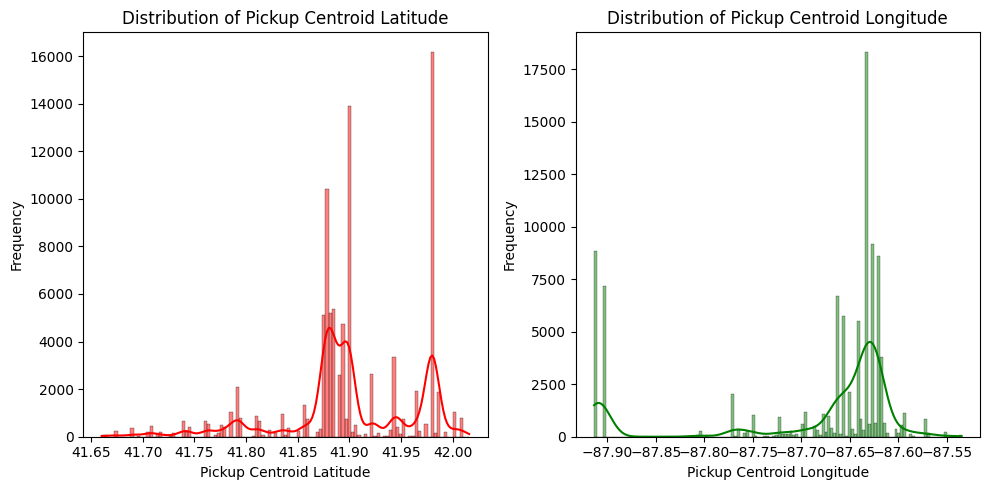

In [15]:
plt.figure(figsize=(10, 5))

# Plot for 'Pickup Centroid Latitude'
plt.subplot(1, 2, 1)
sns.histplot(chicago_taxi_df['Pickup Centroid Latitude'], kde=True, color='red')
plt.xlabel('Pickup Centroid Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Pickup Centroid Latitude')

# Plot for 'Pickup Centroid Longitude'
plt.subplot(1, 2, 2)
sns.histplot(chicago_taxi_df['Pickup Centroid Longitude'], kde=True, color='green')
plt.xlabel('Pickup Centroid Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Pickup Centroid Longitude')

plt.tight_layout()

plt.show()

#### Correlation Heatmap for Chicago Taxi Data

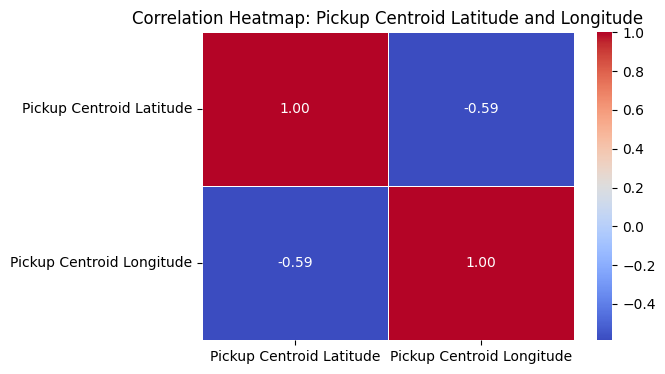

In [16]:
heatmap_data = chicago_taxi_df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']]
correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Pickup Centroid Latitude and Longitude')
plt.show()

#### Scatter Plot 

<Axes: xlabel='Pickup Centroid Latitude', ylabel='Pickup Centroid Longitude'>

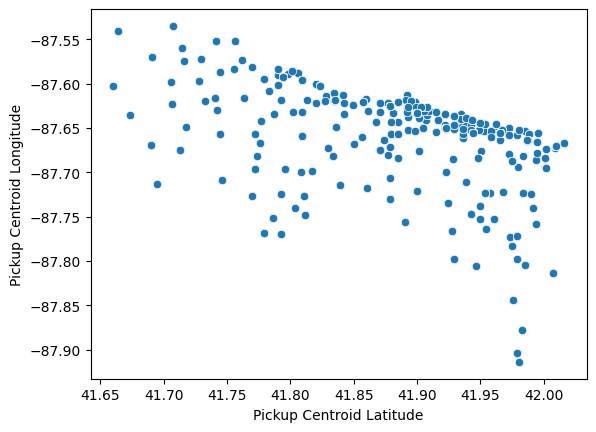

In [17]:
sns.scatterplot(data=chicago_taxi_df, x=chicago_taxi_df['Pickup Centroid Latitude'], y=chicago_taxi_df['Pickup Centroid Longitude'])

#### Checking for undefined values in dataframe

In [18]:
chicago_taxi_df.isnull().sum()

Pickup Centroid Latitude     6131
Pickup Centroid Longitude    6131
dtype: int64

#### Cleaning the dataframe
- Cleaning the dataframe by remvoing undefind values

In [19]:
cleaned_taxi_df = chicago_taxi_df.dropna(inplace=True)
cleaned_taxi_df

#### Standardizing the features
- Importing StandardScaler
- Extracting features 'Pickup Centroid Latitude', 'Pickup Centroid Longitude'

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_taxi = scaler.fit_transform(chicago_taxi_df)

#### Answers for questions mentioned in assignment pdf
- I chose k-means for its simplicity and efficiency in handling numerical data, suitable for exploratory clustering.
- Handled missing values, standardized features using StandardScaler, and determined k through iterative experimentation as a part of pre-   processing
- Will give Visual representation of  k-means output with a scatter plot, color-coding data points by assigned clusters below.
- Will use silhouette score and Davies-Bouldin index; results align with expectations, providing valuable insights for further analysis.

## Demonstration of Clustering Algorithms on Chicago Dataset

In [21]:
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering

### 1. Applying K-Means on Chicago taxi data

#### Reducing data

In [22]:
np.random.seed(42)
indices = np.random.choice(df_taxi.shape[0], size=10179, replace=False)
scaled_data = df_taxi[indices]

#### Evaluating clustering performance for cluster = 4

In [23]:
kmeans_label_4 = KMeans(n_clusters=4, init='k-means++')
kmeans_label_4.fit(scaled_data)

KMeans(n_clusters=4)

In [24]:
silhouette_score_4 = silhouette_score(scaled_data, kmeans_label_4.labels_)
print("Silhouette Score for Taxi data for Kmeans with cluster size 4 is : ", silhouette_score_4)

Silhouette Score for Taxi data for Kmeans with cluster size 4 is :  0.7038660994240027


#### Evaluating clustering performance for each value of n_clusters

In [25]:
silhouette_scores = []
n_clusters_range = range(2, 11)
best_score = -1
best_n_clusters = None

for n_clusters in n_clusters_range:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)  
    
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")  

For n_clusters = 2, the average silhouette score is: 0.4741162940044512
For n_clusters = 3, the average silhouette score is: 0.7024823633908474
For n_clusters = 4, the average silhouette score is: 0.6989354613124471
For n_clusters = 5, the average silhouette score is: 0.7185196403096054
For n_clusters = 6, the average silhouette score is: 0.7107370754452669
For n_clusters = 7, the average silhouette score is: 0.5527712623868462
For n_clusters = 8, the average silhouette score is: 0.6096192917684293
For n_clusters = 9, the average silhouette score is: 0.5834558097757222
For n_clusters = 10, the average silhouette score is: 0.5874495330908653


#### Identifying the best score and best cluster

In [26]:
if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters
print(f"The optimal number of clusters is: {best_n_clusters} (Silhouette Score: {best_score})")

The optimal number of clusters is: 10 (Silhouette Score: 0.5874495330908653)


#### Evaluating clustering performance for cluster = 5

In [27]:
kmeans_label_5 = KMeans(n_clusters=5, init='k-means++')
kmeans_label_5.fit(scaled_data)

KMeans(n_clusters=5)

In [28]:
silhouette_score_5 = silhouette_score(scaled_data, kmeans_label_5.labels_)
print("Silhouette Score for Taxi data for Kmeans with cluster size 5 is : ", silhouette_score_5)

Silhouette Score for Taxi data for Kmeans with cluster size 5 is :  0.7180173046194961


### 2. Applying DBSCAN on Chicago taxi data for different number of samples

#### Evaluating clustering performance 5 samples

In [29]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_score = silhouette_score(scaled_data, dbscan_labels)

print(f"DBSCAN Silhouette Score for taxi data with eps 0.1 and 5 samples : {dbscan_score}")

DBSCAN Silhouette Score for taxi data with eps 0.1 and 5 samples : 0.7521569735295524


#### Evaluating clustering performance for 10 samples

In [30]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan_labelss = dbscan.fit_predict(scaled_data)
dbscan_scoree = silhouette_score(scaled_data, dbscan_labelss)

print(f"DBSCAN Silhouette Score for taxi data with eps 0.2 and 10 samples  : {dbscan_scoree}")

DBSCAN Silhouette Score for taxi data with eps 0.2 and 10 samples  : 0.5344876940025716


### 3. Applying Hierarchical on Chicago taxi data

In [31]:
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(scaled_data)
hierarchical_score = silhouette_score(scaled_data, hierarchical_labels)

print(f"Hierarchical Silhouette Score: {hierarchical_score}")

Hierarchical Silhouette Score: 0.6869464115863932


### 4. Visualization of K-Means, DBSCAN and Hierarchical using Scatterplot
- Applying the k-means algorithm, DBSCAN and Hierarchical to preprocessed Chicago taxi data with scaled features.
- Visualizing the resulting clusters on a scatter plots, where each data point is color-coded based on its assigned cluster.

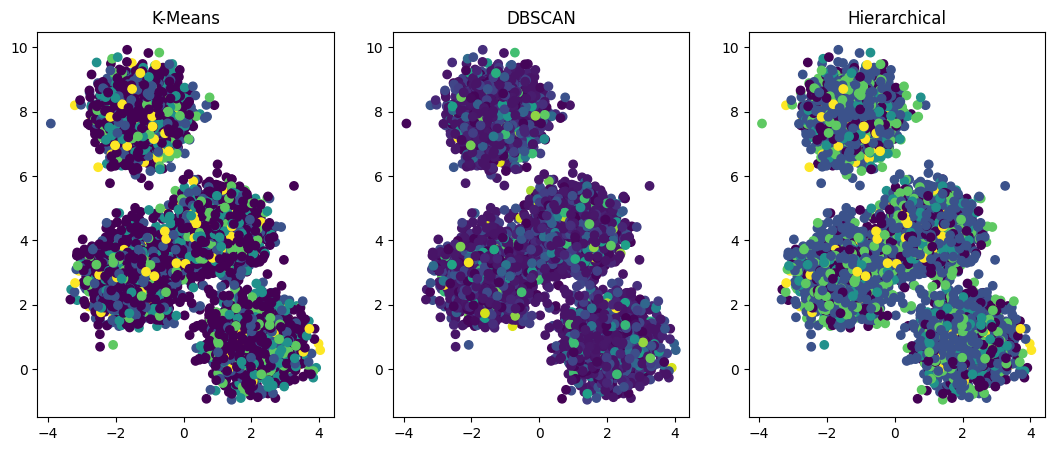

In [32]:
plt.figure(figsize=(13, 5))

X, _ = make_blobs(n_samples=10179, centers=4, cluster_std=0.60, random_state=0)

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_label_5.labels_, cmap='viridis')
plt.title('K-Means')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical')

plt.show()

## EDA for Mopsi Dataset

#### Fetching Mopsi data
Observed that the dataframe has 101,788 entries, ranging from index 0 to 13466.

In [33]:
mopsi_df = pd.read_csv("MopsiLocationsUntil2012-Finland.txt", sep='\t')
mopsi_df.columns = ["Latitude", "Longitude"]
mopsi_df

,Latitude,Longitude
0,626146,297440
1,626144,297456
2,626004,297394
3,626018,297437
4,626038,297518
...,...,...
13461,626042,297444
13462,625977,297443
13463,626050,297404
13464,625995,297426


#### Adjusting the format of Latitude and Longitude Columns

In [34]:
mopsi_df['Latitude'] = mopsi_df['Latitude']/10000
mopsi_df['Longitude'] = mopsi_df['Longitude']/10000
mopsi_df

,Latitude,Longitude
0,62.6146,29.7440
1,62.6144,29.7456
2,62.6004,29.7394
3,62.6018,29.7437
4,62.6038,29.7518
...,...,...
13461,62.6042,29.7444
13462,62.5977,29.7443
13463,62.6050,29.7404
13464,62.5995,29.7426


#### Displaying information about the Mopsi DataFrame
- Observed that both columns contain integer values, and there are no missing values in any of the entries.

In [35]:
mopsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13466 entries, 0 to 13465
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   13466 non-null  float64
 1   Longitude  13466 non-null  float64
dtypes: float64(2)
memory usage: 210.5 KB


#### Descriptive Statistics for Mopsi Data

In [36]:
mopsi_df.describe()

,Latitude,Longitude
count,13466.000000,13466.000000
mean,62.509471,28.900404
std,0.784462,2.040006
min,59.924700,21.201600
25%,62.593000,29.616000
50%,62.601800,29.744800
75%,62.619200,29.779675
max,69.783500,31.432800


#### Scaling Mopsi Data

In [37]:
scaler = StandardScaler()
df_mopsi_scaled = scaler.fit_transform(mopsi_df)
df_mopsi_scaled 

array([[0.13401914, 0.41354153],
       [0.13376418, 0.41432587],
       [0.11591689, 0.41128655],
       ...,
       [0.121781  , 0.41177677],
       [0.11476956, 0.41285523],
       [0.11311231, 0.41310034]])

In [38]:
print("Shape of df_mopsi_scaled:", df_mopsi_scaled.shape)
print("Type of df_mopsi_scaled:", type(df_mopsi_scaled))

Shape of df_mopsi_scaled: (13466, 2)
Type of df_mopsi_scaled: <class 'numpy.ndarray'>


#### Visual representation of the distribution, median, quartiles and potential outliers

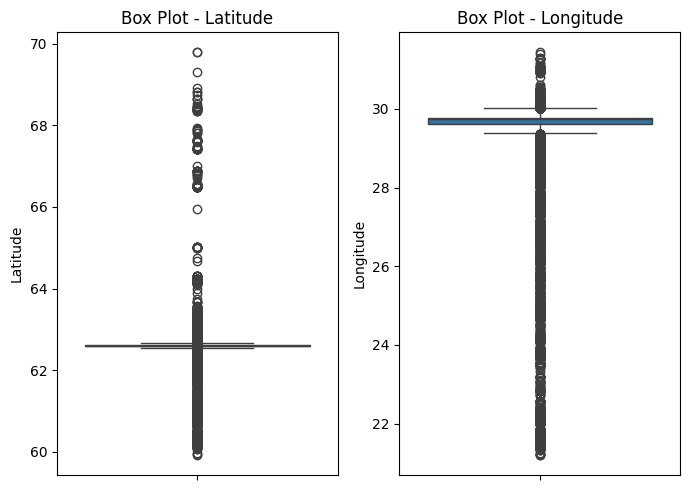

In [39]:
plt.figure(figsize=(7, 5))

plt.subplot(1, 2, 1)
sns.boxplot(mopsi_df.iloc[:, 0])
plt.title(f'Box Plot - {mopsi_df.columns[0]}')

plt.subplot(1, 2, 2)
sns.boxplot(mopsi_df.iloc[:, 1])
plt.title(f'Box Plot - {mopsi_df.columns[1]}')

plt.tight_layout()
plt.show()

#### Distribution Analysis of Mopsi Data Columns

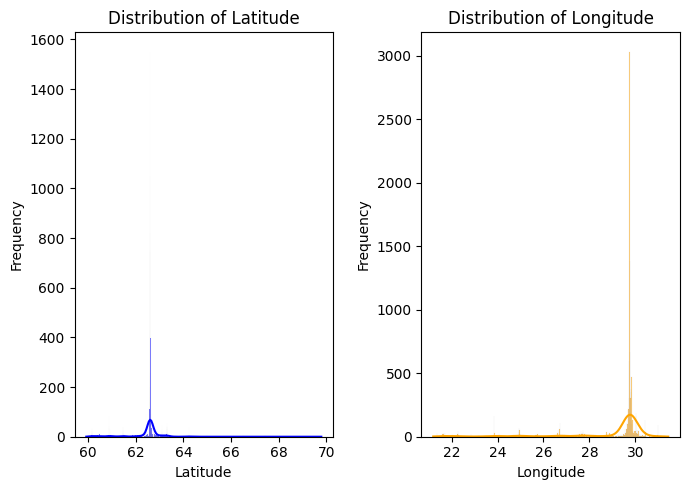

In [40]:
plt.figure(figsize=(7, 5))

plt.subplot(1, 2, 1)
sns.histplot(mopsi_df.iloc[:, 0], kde=True, color='blue')
plt.xlabel(mopsi_df.columns[0])
plt.ylabel('Frequency')
plt.title(f'Distribution of {mopsi_df.columns[0]}')

plt.subplot(1, 2, 2)
sns.histplot(mopsi_df.iloc[:, 1], kde=True, color='orange')
plt.xlabel(mopsi_df.columns[1])
plt.ylabel('Frequency')
plt.title(f'Distribution of {mopsi_df.columns[1]}')

plt.tight_layout()
plt.show()

## Demonstration of Clustering Algorithms on Mopsi Dataset

In [41]:
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering

### 1. Applying K-Mean on Mopsi data

#### Evaluating clustering performance for cluster = 4

In [42]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans_labels = kmeans.fit(df_mopsi_scaled)

In [43]:
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(df_mopsi_scaled, kmeans_labels.labels_)
print("Silhouette Score for Mopsi data for Kmeans with cluster size 4 is : ", silhouette_score)

Silhouette Score for Mopsi data for Kmeans with cluster size 4 is :  0.8265616851174564


#### Evaluating clustering performance for each value of n_clusters

In [44]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
n_clusters_range = range(2, 11)
best_score = -1
best_n_clusters = None

for n_clusters in n_clusters_range:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_mopsi_scaled)
    silhouette_avg = silhouette_score(df_mopsi_scaled, cluster_labels)
    
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}") 

For n_clusters = 2, the average silhouette score is: 0.8005470803132114
For n_clusters = 3, the average silhouette score is: 0.8057261753736416
For n_clusters = 4, the average silhouette score is: 0.825115613266333
For n_clusters = 5, the average silhouette score is: 0.7532185914187809
For n_clusters = 6, the average silhouette score is: 0.7583805250414928
For n_clusters = 7, the average silhouette score is: 0.735734098839577
For n_clusters = 8, the average silhouette score is: 0.7611681791778035
For n_clusters = 9, the average silhouette score is: 0.7704977502083394
For n_clusters = 10, the average silhouette score is: 0.7806637918950272


#### Identifying the best score and best cluster

In [45]:
if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters
print(f"The optimal number of clusters is: {best_n_clusters} (Silhouette Score: {best_score})")

The optimal number of clusters is: 10 (Silhouette Score: 0.7806637918950272)


#### Evaluating clustering performance for cluster = 6

In [46]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels_6 = kmeans.fit(df_mopsi_scaled)
kmeans_labels_6 = kmeans_labels_6.labels_

In [47]:
from sklearn.metrics import silhouette_score
silhouette_score_6 = silhouette_score(df_mopsi_scaled, kmeans_labels_6)
print("Silhouette Score for Mopsi data for Kmeans with cluster size 6 is : ", silhouette_score_6)

Silhouette Score for Mopsi data for Kmeans with cluster size 6 is :  0.7583805250414928


### 2. Applying DBSCAN on Mopsi data for different number of samples

#### Evaluating clustering performance for 5 samples

In [48]:
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_mopsi_scaled)
dbscan_score = silhouette_score(df_mopsi_scaled, dbscan_labels)

print(f"DBSCAN Silhouette Score for Mopsi data with eps 0.3 and 5 samples : {dbscan_score}")

DBSCAN Silhouette Score for Mopsi data with eps 0.3 and 5 samples : 0.5606152390059531


#### Evaluating clustering performance for 10 samples

In [49]:
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(df_mopsi_scaled)
dbscan_score = silhouette_score(df_mopsi_scaled, dbscan_labels)

print(f"DBSCAN Silhouette Score for Mopsi data with eps 0.3 and 5 samples : {dbscan_score}")

DBSCAN Silhouette Score for Mopsi data with eps 0.3 and 5 samples : 0.6141801123791599


### 3. Applying Hierrarchical on Mopsi data

In [50]:
from sklearn.metrics import silhouette_score

hierarchical = AgglomerativeClustering(n_clusters=3)
agg_labels = hierarchical.fit_predict(df_mopsi_scaled)
hierarchical_score = silhouette_score(df_mopsi_scaled, agg_labels)

print(f"Hierarchical Silhouette Score: {hierarchical_score}")

Hierarchical Silhouette Score: 0.8141237144987328


### 4. Visualization of K-Means, DBSCAN and Hierarchical using Scatterplot

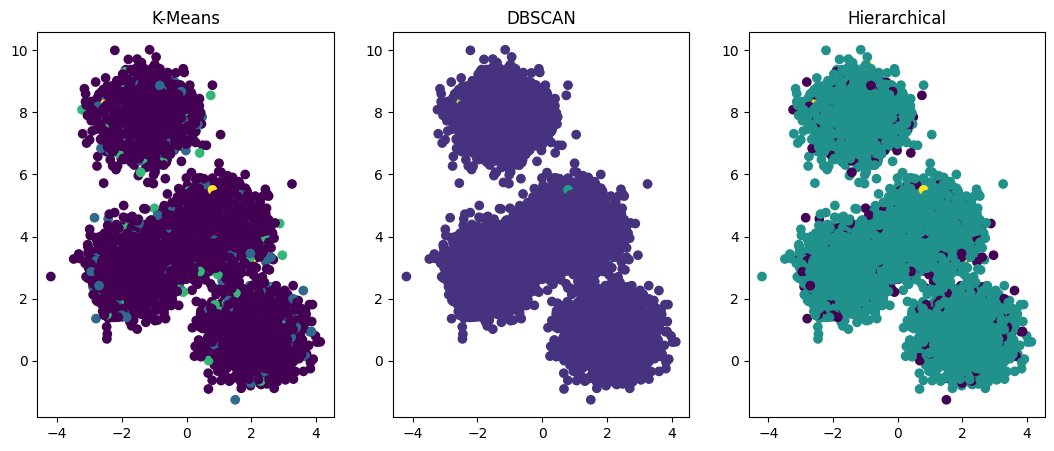

In [51]:
plt.figure(figsize=(13, 5))

X, _ = make_blobs(n_samples=13466, centers=4, cluster_std=0.60, random_state=0)

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels.labels_, cmap='viridis')
plt.title('K-Means')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical')

plt.show()

### 5. Answers for questions mentioned in assignment pdf

- K-Means is good for grouping similar things together. It helps find patterns in data.
- Ensured all tasks are on the same scale. 
- K-Means divided my tasks into groups. Each group got a label, showing which activities are similar.
- Used Silhouette Score to see how well K-Means did. A higher score is indicating clearer groups.

# 4. To extend the functionality of the developed K-Means implementation through additional parameters
- Implemented extended K-Mean version in Extended_KMeans.py file

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from Enhanced_KMeans import KMeans
from sklearn.datasets import make_blobs

### Input data
- These data points represent coordinates in a 2D space.
- The goal is to apply the K-Means algorithm to cluster these points into distinct groups.
- Each sublist in X corresponds to the (x, y) coordinates of an instance.
- This sample data has 8 instances for demonstration purposes.

In [53]:
X = np.array([[0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10]])

### Applying Extended K-Means Clustering
- Initializing a KMeans object with k=4, indicating the desired number of clusters.
- balanced is an optional parameter which modifies the K-Means algorithm to try to balance the sizes of the clusters, so that clusters become roughly equal in terms of the number of instances.
- max_iter is setting the maximum number of iterations for the K-Means algorithm to converge.
- The result includes cluster labels assigned to each data point (cluster_labels)
  and the coordinates of the cluster centroids (centroids).

In [54]:
Extended_KMeans = KMeans(k=4, balanced=True, max_iter=2)
Extended_KMeans.fit(X)

(array([0, 1, 0, 1, 3, 3, 2, 2]),
 array([[0., 1.],
        [2., 1.],
        [9., 9.],
        [9., 9.]]))

### Evaluating the clustering using Silhouette Score

In [55]:
silhouette_avg = silhouette_score(X, Extended_KMeans.labels_)
print(f"Silhouette Score for Extended KMeans is: {silhouette_avg}")

Silhouette Score for Extended KMeans is: -0.060660171779821345


### Performance Analysis
- Extracting cluster labels and centroids
- Plotting data points
- Plotting cluster centroids

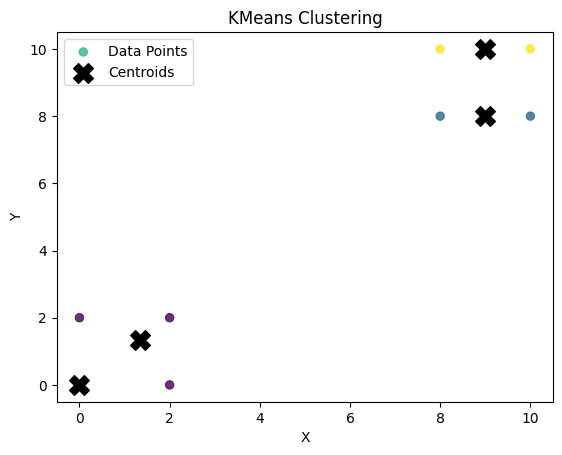

In [56]:
np.random.seed(42)
kmeans = KMeans(k=4, max_iter=2, balanced=False)

labels, centroids = kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.8, linewidths=0.8, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Conclusion 
- I observed that in normal KMeans, clusters are formed based on minimizing the sum of squared distances, but there's no consideration for  making the cluster sizes equal.
- Cluster sizes may vary widely, and the algorithm is focused on optimizing the overall compactness of the clusters.
- But in the Enhanced KMean algorithm with balanced, the algorithm tries to create clusters of roughly equal sizes.
- This helps to prevent situations where some clusters become much larger than others.
- It is useful when we need clusters to be more evenly distributed in terms of the number of data points they contain.